In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s

In [2]:
df = pd.read_csv('modele.csv', dtype={'NewUserId': str})
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
pd.set_option('display.max_columns', None)
df

NewUserId  WasAddedToCart  WasAddedToCart_sum  \
0         629835214461368392               0                   0   
1                    6156947               0                   0   
2        6298370606872454516               0                   0   
3        6298374081547046372               0                   0   
4                   23438869               0                   0   
...                      ...             ...                 ...   
1455988             14563067               1                  18   
1455989    99505086684061834               0                   0   
1455990   995051316028061795               0                   0   
1455991   995067112917890439               0                   0   
1455992    99506800360300550               0                   0   

         WasAddedToCart_mean  WasBought  WasBought_sum  WasBought_mean  \
0                          0          0              0               0   
1                          0          0              0               0   
2                          0          0              0               0   
3                          0          0              0               0   
4                          0          0              0               0   
...                      ...        ...            ...             ...   
1455988                    0          0              0               0   
1455989                    0          0              0               0   
1455990                    0          0              0               0   
1455991                    0          0              0               0   
1455992                    0          0              0               0   

         OpenSizeTab  RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                  0             0           1      0  0  0  0    1    1    1   
1                  0             1           1      0  0  0  0    0    1    0   
2                  0             0           1      0  0  0  0    1    1    0   
3                  0             0           1      0  0  0  0    0    0    1   
4                  0             1           1      0  0  0  0    1    1    1   
...              ...           ...         ...    ... .. .. ..  ...  ...  ...   
1455988            0             1           1      1  0  1  1    1    1    1   
1455989            0             0           1      0  0  0  0    1    0    0   
1455990            0             0           1      0  0  0  0    0    1    0   
1455991            0             0           0      0  0  0  0    0    1    0   
1455992            0             0           0      0  0  0  0    0    1    1   

         AvgTimeOnPage_sum  AvgTimeOnPage_mean  AvgTimeOnPage_klikacz  \
0                      223                  15                      0   
1                        3                   3                      1   
2                       60                   8                      1   
3                       31                  31                      0   
4                      114                  11                      1   
...                    ...                 ...                    ...   
1455988               1100                  22                      1   
1455989                  0                   0                      1   
1455990                  1                   1                      1   
1455991                 17                   8                      0   
1455992                219                  54                      1   

         AvgTimeOnPage_mysliciel  AvgTimeOnPage_przecietny  \
0                              0                         1   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         1   
...                          ...                       ...   
1455988                      

In [3]:
kopia = df[['AvgTimeOnPage_sum','AvgTimeOnPage_mean']]

In [4]:
#normalizacja
zmienne_ciagle=['AvgTimeOnPage_sum','AvgTimeOnPage_mean','ViewsCount_sum','ViewsCount_mean','AccordionExpand_sum','AccordionExpand_mean','ChangeImage_sum','ChangeImage_mean']
df[zmienne_ciagle] = (df[zmienne_ciagle] - df[zmienne_ciagle].min())/(df[zmienne_ciagle].max() - df[zmienne_ciagle].min())

In [5]:
df

NewUserId  WasAddedToCart  WasAddedToCart_sum  \
0         629835214461368392               0                   0   
1                    6156947               0                   0   
2        6298370606872454516               0                   0   
3        6298374081547046372               0                   0   
4                   23438869               0                   0   
...                      ...             ...                 ...   
1455988             14563067               1                  18   
1455989    99505086684061834               0                   0   
1455990   995051316028061795               0                   0   
1455991   995067112917890439               0                   0   
1455992    99506800360300550               0                   0   

         WasAddedToCart_mean  WasBought  WasBought_sum  WasBought_mean  \
0                          0          0              0               0   
1                          0          0              0               0   
2                          0          0              0               0   
3                          0          0              0               0   
4                          0          0              0               0   
...                      ...        ...            ...             ...   
1455988                    0          0              0               0   
1455989                    0          0              0               0   
1455990                    0          0              0               0   
1455991                    0          0              0               0   
1455992                    0          0              0               0   

         OpenSizeTab  RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                  0             0           1      0  0  0  0    1    1    1   
1                  0             1           1      0  0  0  0    0    1    0   
2                  0             0           1      0  0  0  0    1    1    0   
3                  0             0           1      0  0  0  0    0    0    1   
4                  0             1           1      0  0  0  0    1    1    1   
...              ...           ...         ...    ... .. .. ..  ...  ...  ...   
1455988            0             1           1      1  0  1  1    1    1    1   
1455989            0             0           1      0  0  0  0    1    0    0   
1455990            0             0           1      0  0  0  0    0    1    0   
1455991            0             0           0      0  0  0  0    0    1    0   
1455992            0             0           0      0  0  0  0    0    1    1   

         AvgTimeOnPage_sum  AvgTimeOnPage_mean  AvgTimeOnPage_klikacz  \
0                 0.009807            0.025000                      0   
1                 0.000132            0.005000                      1   
2                 0.002639            0.013333                      1   
3                 0.001363            0.051667                      0   
4                 0.005014            0.018333                      1   
...                    ...                 ...                    ...   
1455988           0.048377            0.036667                      1   
1455989           0.000000            0.000000                      1   
1455990           0.000044            0.001667                      1   
1455991           0.000748            0.013333                      0   
1455992           0.009631            0.090000                      1   

         AvgTimeOnPage_mysliciel  AvgTimeOnPage_przecietny  \
0                              0                         1   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         1   
...                          ...                       ...   
1455988                      

In [6]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['Color_bialy',
       'Color_brazowy', 'Color_czarny', 'Color_czerwony', 'Color_fioletowy',
       'Color_inne', 'Color_niebieski', 'Color_pastelowy', 'Color_pomarancz',
       'Color_rozowy', 'Color_szary', 'Color_zielony', 'Color_zolty']])
kolorki = pd.DataFrame(data = pcaComp,columns=['kolor'])
kolorki


kolor
0        1.292445
1       -0.537062
2        0.221665
3       -0.500102
4        0.884607
...           ...
1455988  1.608749
1455989 -0.537062
1455990 -0.500102
1455991 -0.358743
1455992  0.139449

[1455993 rows x 1 columns]

In [7]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['Color_bialy',
       'Color_brazowy', 'Color_czarny', 'Color_czerwony', 'Color_fioletowy',
       'Color_inne', 'Color_niebieski', 'Color_pastelowy', 'Color_pomarancz',
       'Color_rozowy', 'Color_szary', 'Color_zielony', 'Color_zolty']])
kolorki = pd.DataFrame(data = pcaComp,columns=['kolor'])
kolorki


kolor
0        1.292446
1       -0.537062
2        0.221666
3       -0.500102
4        0.884607
...           ...
1455988  1.608749
1455989 -0.537062
1455990 -0.500102
1455991 -0.358742
1455992  0.139449

[1455993 rows x 1 columns]

In [8]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['Color_bialy',
       'Color_brazowy', 'Color_czarny', 'Color_czerwony', 'Color_fioletowy',
       'Color_inne', 'Color_niebieski', 'Color_pastelowy', 'Color_pomarancz',
       'Color_rozowy', 'Color_szary', 'Color_zielony', 'Color_zolty']])
kolorki = pd.DataFrame(data = pcaComp,columns=['kolor'])
kolorki


kolor
0        1.292445
1       -0.537062
2        0.221665
3       -0.500102
4        0.884607
...           ...
1455988  1.608749
1455989 -0.537062
1455990 -0.500102
1455991 -0.358743
1455992  0.139449

[1455993 rows x 1 columns]

In [9]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['S', 'M', 'L']])
rozmiary = pd.DataFrame(data = pcaComp,columns=['rozmiar'])
rozmiary

rozmiar
0       -0.191975
1       -0.191975
2       -0.191975
3       -0.191975
4       -0.191975
...           ...
1455988  0.886897
1455989 -0.191975
1455990 -0.191975
1455991 -0.191975
1455992 -0.191975

[1455993 rows x 1 columns]

In [10]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['FashionLevelSimple_basic', 'FashionLevelSimple_best',
       'FashionLevelSimple_brak', 'FashionLevelSimple_core',
       'FashionLevelSimple_direct', 'FashionLevelSimple_inne']])
fashion_level = pd.DataFrame(data = pcaComp,columns=['fashion_level'])
fashion_level

fashion_level
0             0.631732
1             0.313306
2            -0.031644
3             0.336712
4            -0.008239
...                ...
1455988       0.804865
1455989      -0.671615
1455990      -0.153532
1455991      -0.008239
1455992      -0.008239

[1455993 rows x 1 columns]

In [11]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['LIP', 'MIP', 'HIP']])
kategoria_cenowa = pd.DataFrame(data = pcaComp,columns=['kategoria_cenowa'])
kategoria_cenowa

kategoria_cenowa
0                0.470238
1               -0.743734
2               -0.047308
3                0.270942
4                0.470238
...                   ...
1455988          0.470238
1455989          0.449821
1455990         -0.743734
1455991         -0.743734
1455992         -0.226188

[1455993 rows x 1 columns]

In [12]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['DepartmentName_accessories', 'DepartmentName_kids',
       'DepartmentName_ladies', 'DepartmentName_men']])
departament = pd.DataFrame(data = pcaComp,columns=['departament'])
departament

departament
0          -0.240815
1          -0.355862
2          -0.355862
3           1.038601
4          -0.355862
...              ...
1455988     0.311874
1455989    -0.355862
1455990    -0.355862
1455991    -0.355862
1455992     0.311874

[1455993 rows x 1 columns]

In [13]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[[ 'Season_AW',
       'Season_SS']])
sezon = pd.DataFrame(data = pcaComp,columns=['sezon'])
sezon

sezon
0        0.075309
1       -0.663161
2        0.075309
3       -0.663161
4        0.075309
...           ...
1455988  0.075309
1455989 -0.663161
1455990 -0.663161
1455991  0.749595
1455992  0.749595

[1455993 rows x 1 columns]

In [14]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_klikacz', 'ViewsCount_mysliciel', 'ViewsCount_przecietny',
       'AccordionExpand_klikacz', 'AccordionExpand_nieklikacz',
'ChangeImage_mysliciel', 'ChangeImage_nieklikacz',
       'ChangeImage_przecietny','OpenSizeTab']])
zainteresowanie_produktem = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem'])
zainteresowanie_produktem

zainteresowanie_produktem
0                        -0.109265
1                        -0.570169
2                         0.893876
3                        -0.694243
4                         0.893876
...                            ...
1455988                   0.893876
1455989                  -0.694243
1455990                  -0.570169
1455991                  -0.570169
1455992                  -0.233339

[1455993 rows x 1 columns]

In [15]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_sum', 'AccordionExpand_sum',
       'ChangeImage_sum','OpenSizeTab']])
zainteresowanie_produktem_sum = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem_sum'])
zainteresowanie_produktem_sum

zainteresowanie_produktem_sum
0                            -0.043614
1                            -0.043927
2                            -0.043844
3                            -0.043936
4                            -0.043694
...                                ...
1455988                      -0.043024
1455989                      -0.043936
1455990                      -0.043922
1455991                      -0.043909
1455992                      -0.043882

[1455993 rows x 1 columns]

In [16]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_mean', 'AccordionExpand_mean',
       'ChangeImage_mean','OpenSizeTab']])
zainteresowanie_produktem_mean = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem_mean'])
zainteresowanie_produktem_mean

zainteresowanie_produktem_mean
0                             -0.043459
1                             -0.043963
2                             -0.044214
3                             -0.044466
4                             -0.043711
...                                 ...
1455988                       -0.043963
1455989                       -0.044466
1455990                       -0.043711
1455991                       -0.043963
1455992                       -0.043963

[1455993 rows x 1 columns]

In [17]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['WasAddedToCart', 'WasBought']])
zakup = pd.DataFrame(data = pcaComp,columns=['zakup'])
zakup

zakup
0       -0.227519
1       -0.227519
2       -0.227519
3       -0.227519
4       -0.227519
...           ...
1455988  0.738072
1455989 -0.227519
1455990 -0.227519
1455991 -0.227519
1455992 -0.227519

[1455993 rows x 1 columns]

In [18]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['AvgTimeOnPage_klikacz', 'AvgTimeOnPage_mysliciel',
       'AvgTimeOnPage_przecietny', 'AvgTimeOnPage_zainteresowany']])
czas_na_stronie = pd.DataFrame(data = pcaComp,columns=['czas_na_stronie'])
czas_na_stronie

czas_na_stronie
0               0.758377
1              -0.886469
2              -0.335168
3               0.207076
4              -0.335168
...                  ...
1455988         0.306057
1455989        -0.886469
1455990        -0.886469
1455991         0.355429
1455992        -0.245244

[1455993 rows x 1 columns]

In [19]:
df2 = pd.concat([df[['Child']], df[['SaleStatus']],df[['RegisterFlag']],kolorki,rozmiary,kategoria_cenowa,fashion_level,czas_na_stronie,departament,sezon,zainteresowanie_produktem,zainteresowanie_produktem_sum,zainteresowanie_produktem_mean,zakup,kopia], axis=1)
df2=df2.round(6)
df2

Child  SaleStatus  RegisterFlag     kolor   rozmiar  \
0            0           1             0  1.292445 -0.191975   
1            0           1             1 -0.537062 -0.191975   
2            0           1             0  0.221665 -0.191975   
3            0           1             0 -0.500102 -0.191975   
4            0           1             1  0.884607 -0.191975   
...        ...         ...           ...       ...       ...   
1455988      1           1             1  1.608749  0.886897   
1455989      0           1             0 -0.537062 -0.191975   
1455990      0           1             0 -0.500102 -0.191975   
1455991      0           0             0 -0.358743 -0.191975   
1455992      0           0             0  0.139449 -0.191975   

         kategoria_cenowa  fashion_level  czas_na_stronie  departament  \
0                0.470238       0.631732         0.758377    -0.240815   
1               -0.743734       0.313306        -0.886469    -0.355862   
2               -0.047308      -0.031644        -0.335168    -0.355862   
3                0.270942       0.336712         0.207076     1.038601   
4                0.470238      -0.008239        -0.335168    -0.355862   
...                   ...            ...              ...          ...   
1455988          0.470238       0.804865         0.306057     0.311874   
1455989          0.449821      -0.671615        -0.886469    -0.355862   
1455990         -0.743734      -0.153532        -0.886469    -0.355862   
1455991         -0.743734      -0.008239         0.355429    -0.355862   
1455992         -0.226188      -0.008239        -0.245244     0.311874   

            sezon  zainteresowanie_produktem  zainteresowanie_produktem_sum  \
0        0.075309                  -0.109265                      -0.043614   
1       -0.663161                  -0.570169                      -0.043927   
2        0.075309                   0.893876                      -0.043844   
3       -0.663161                  -0.694243                      -0.043936   
4        0.075309                   0.893876                      -0.043694   
...           ...                        ...                            ...   
1455988  0.075309                   0.893876                      -0.043024   
1455989 -0.663161                  -0.694243                      -0.043936   
1455990 -0.663161                  -0.570169                      -0.043922   
1455991  0.749595                  -0.570169                      -0.043909   
1455992  0.749595                  -0.233339                      -0.043882   

         zainteresowanie_produktem_mean     zakup  AvgTimeOnPage_sum  \
0                             -0.043459 -0.227519                223   
1                             -0.043963 -0.227519                  3   
2                             -0.044214 -0.227519                 60   
3                             -0.044466 -0.227519                 31   
4                             -0.043711 -0.227519                114   
...                                 ...       ...                ...   
1455988                       -0.043963  0.738072               1100   
1455989                       -0.044466 -0.227519                  0   
1455990                       -0.043711 -0.227519                  1   
1455991                       -0.043963 -0.227519                 17   
1455992                       -0.043963 -0.227519                219   

         AvgTimeOnPage_mean  
0                        15  
1                         3  
2                         8  
3                        31  
4                        11  
...                     ...  
1455988                  22  
1455989                   0  
1455990                   1  
1455991                   8  
1455992                  54  

[1455993 rows x 16 columns]

# Nowe zmienne pca

In [20]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_sum',
        'AccordionExpand_sum','ChangeImage_sum']])
zainteresowanie_sum = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_sum'])
zainteresowanie_sum


zainteresowanie_sum
0                   0.014495
1                  -0.006374
2                  -0.001181
3                  -0.007018
4                   0.008926
...                      ...
1455988             0.053081
1455989            -0.007018
1455990            -0.006052
1455991            -0.005190
1455992            -0.003465

[1455993 rows x 1 columns]

In [21]:
print(pca.explained_variance_ratio_)

[0.82747653]


In [22]:
from sklearn.cluster import KMeans
import plotly.graph_objs as go


In [23]:
df2 = df2.join(zainteresowanie_sum)
df2

Child  SaleStatus  RegisterFlag     kolor   rozmiar  \
0            0           1             0  1.292445 -0.191975   
1            0           1             1 -0.537062 -0.191975   
2            0           1             0  0.221665 -0.191975   
3            0           1             0 -0.500102 -0.191975   
4            0           1             1  0.884607 -0.191975   
...        ...         ...           ...       ...       ...   
1455988      1           1             1  1.608749  0.886897   
1455989      0           1             0 -0.537062 -0.191975   
1455990      0           1             0 -0.500102 -0.191975   
1455991      0           0             0 -0.358743 -0.191975   
1455992      0           0             0  0.139449 -0.191975   

         kategoria_cenowa  fashion_level  czas_na_stronie  departament  \
0                0.470238       0.631732         0.758377    -0.240815   
1               -0.743734       0.313306        -0.886469    -0.355862   
2               -0.047308      -0.031644        -0.335168    -0.355862   
3                0.270942       0.336712         0.207076     1.038601   
4                0.470238      -0.008239        -0.335168    -0.355862   
...                   ...            ...              ...          ...   
1455988          0.470238       0.804865         0.306057     0.311874   
1455989          0.449821      -0.671615        -0.886469    -0.355862   
1455990         -0.743734      -0.153532        -0.886469    -0.355862   
1455991         -0.743734      -0.008239         0.355429    -0.355862   
1455992         -0.226188      -0.008239        -0.245244     0.311874   

            sezon  zainteresowanie_produktem  zainteresowanie_produktem_sum  \
0        0.075309                  -0.109265                      -0.043614   
1       -0.663161                  -0.570169                      -0.043927   
2        0.075309                   0.893876                      -0.043844   
3       -0.663161                  -0.694243                      -0.043936   
4        0.075309                   0.893876                      -0.043694   
...           ...                        ...                            ...   
1455988  0.075309                   0.893876                      -0.043024   
1455989 -0.663161                  -0.694243                      -0.043936   
1455990 -0.663161                  -0.570169                      -0.043922   
1455991  0.749595                  -0.570169                      -0.043909   
1455992  0.749595                  -0.233339                      -0.043882   

         zainteresowanie_produktem_mean     zakup  AvgTimeOnPage_sum  \
0                             -0.043459 -0.227519                223   
1                             -0.043963 -0.227519                  3   
2                             -0.044214 -0.227519                 60   
3                             -0.044466 -0.227519                 31   
4                             -0.043711 -0.227519                114   
...                                 ...       ...                ...   
1455988                       -0.043963  0.738072               1100   
1455989                       -0.044466 -0.227519                  0   
1455990                       -0.043711 -0.227519                  1   
1455991                       -0.043963 -0.227519                 17   
1455992                       -0.043963 -0.227519                219   

         AvgTimeOnPage_mean  zainteresowanie_sum  
0                        15             0.014495  
1                         3            -0.006374  
2                         8            -0.001181  
3                        31            -0.007018  
4                        11             0.008926  
...                     ...                  ...  
1455988                  22             0.053081  
1455989                   0            -0.007018  
1455990                   1            -0.006052  
1455991                   8

# Nowe modele

In [24]:
df_zainteresowanie_fashion = df2[['kolor','zainteresowanie_sum']]
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zainteresowanie_fashion, test_size=0.7, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)


(436797, 2)
(1019196, 2)


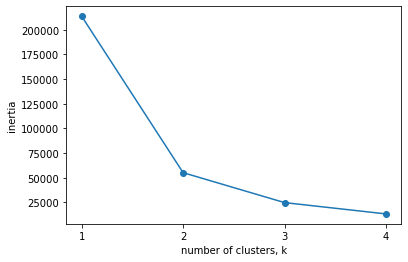

In [25]:
ks = range(1, 5)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_ucz)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

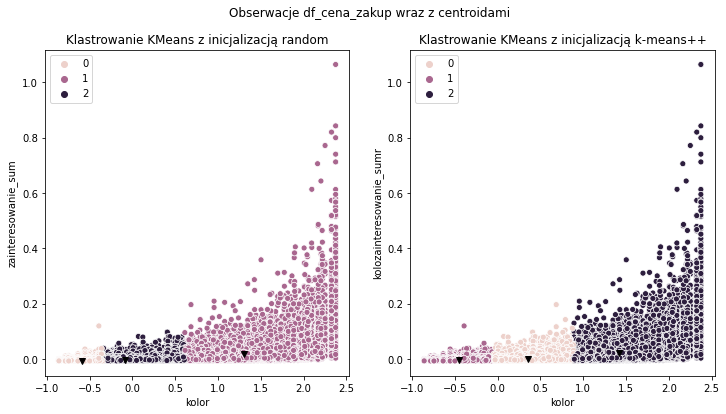

In [29]:
# KMeans
np.random.seed(100)
algorithms = ['WARD', 'AVERAGE']

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['kolor'], y=X_ucz['zainteresowanie_sum'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['kolor'], y=X_ucz['zainteresowanie_sum'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'kv')
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'kv')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_cena_zakup wraz z centroidami')
plt.xlabel('kolor')
plt.ylabel('zainteresowanie_sumr')
plt.show()


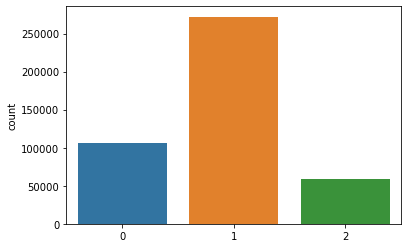

In [27]:
sns.countplot(y_cluster_plusplus)

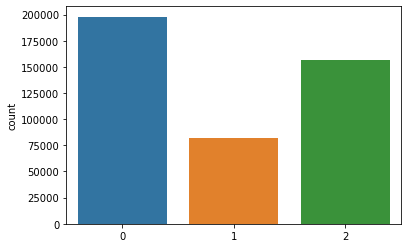

In [28]:
sns.countplot(y_cluster_random)